In [1]:
import json
import pandas as pd
import numpy as np 
import requests
import seaborn as sns
from datetime import datetime
from requests.auth import HTTPDigestAuth
from matplotlib import pyplot as plt

/Users/marantz/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
PUB_KEY="wmhpimjc"
PRIVATE_KEY="00634500-6801-4399-8463-e94c09df6521"
GROUP_ID="5cc99cd879358e1a071da4a5"\
# curl -i -u "{PUBLIC-KEY}:{PRIVATE-KEY}"
# --digest "https://cloud.mongodb.com/api/atlas/v1.0/groups/{GROUP-ID}/processes/
# atlas-39m1v8-shard-00-01.pmezp.mongodb.net:27017
# measurements?granularity=PT1M&period=2H&pretty=true"
RESOURCE_ID="atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017"

BASE_URL="https://cloud.mongodb.com/api/atlas/v1.0/groups/"
REQUESTS_URL=BASE_URL + GROUP_ID + "/processes/"+ RESOURCE_ID +"/measurements?granularity=PT1M&period=PT1H"
REQUESTS_URL

'https://cloud.mongodb.com/api/atlas/v1.0/groups/5cc99cd879358e1a071da4a5/processes/atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017/measurements?granularity=PT1M&period=PT1H'

In [3]:
response=requests.get(REQUESTS_URL, auth=HTTPDigestAuth(PUB_KEY, PRIVATE_KEY))

In [4]:
response.status_code 

200

In [5]:
response.text

'{"end":"2021-10-21T06:29:59Z","granularity":"PT1M","groupId":"5cc99cd879358e1a071da4a5","hostId":"atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017","links":[{"href":"https://cloud.mongodb.com/api/atlas/v1.0/groups/5cc99cd879358e1a071da4a5/processes/atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017/measurements?granularity=PT1M&period=PT1H","rel":"self"},{"href":"https://cloud.mongodb.com/api/atlas/v1.0/groups/5cc99cd879358e1a071da4a5/processes/atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017","rel":"http://cloud.mongodb.com/host"}],"measurements":[{"dataPoints":[{"timestamp":"2021-10-21T05:30:58Z","value":null},{"timestamp":"2021-10-21T05:31:17Z","value":null},{"timestamp":"2021-10-21T05:31:58Z","value":0.0},{"timestamp":"2021-10-21T05:32:39Z","value":null},{"timestamp":"2021-10-21T05:32:58Z","value":0.0},{"timestamp":"2021-10-21T05:33:58Z","value":0.0},{"timestamp":"2021-10-21T05:34:01Z","value":null},{"timestamp":"2021-10-21T05:34:58Z","value":0.0},{"timestamp":"2021-10-21T05:35:22Z"

In [6]:
dict = json.loads(response.text)
dict

{'end': '2021-10-21T06:29:59Z',
 'granularity': 'PT1M',
 'groupId': '5cc99cd879358e1a071da4a5',
 'hostId': 'atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017',
 'links': [{'href': 'https://cloud.mongodb.com/api/atlas/v1.0/groups/5cc99cd879358e1a071da4a5/processes/atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017/measurements?granularity=PT1M&period=PT1H',
   'rel': 'self'},
  {'href': 'https://cloud.mongodb.com/api/atlas/v1.0/groups/5cc99cd879358e1a071da4a5/processes/atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017',
   'rel': 'http://cloud.mongodb.com/host'}],
 'measurements': [{'dataPoints': [{'timestamp': '2021-10-21T05:30:58Z',
     'value': None},
    {'timestamp': '2021-10-21T05:31:17Z', 'value': None},
    {'timestamp': '2021-10-21T05:31:58Z', 'value': 0.0},
    {'timestamp': '2021-10-21T05:32:39Z', 'value': None},
    {'timestamp': '2021-10-21T05:32:58Z', 'value': 0.0},
    {'timestamp': '2021-10-21T05:33:58Z', 'value': 0.0},
    {'timestamp': '2021-10-21T05:34:01Z', 'value': Non

In [7]:
results=dict['measurements']

In [8]:
results

[{'dataPoints': [{'timestamp': '2021-10-21T05:30:58Z', 'value': None},
   {'timestamp': '2021-10-21T05:31:17Z', 'value': None},
   {'timestamp': '2021-10-21T05:31:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:32:39Z', 'value': None},
   {'timestamp': '2021-10-21T05:32:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:33:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:34:01Z', 'value': None},
   {'timestamp': '2021-10-21T05:34:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:35:22Z', 'value': None},
   {'timestamp': '2021-10-21T05:35:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:36:43Z', 'value': None},
   {'timestamp': '2021-10-21T05:36:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:37:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:38:04Z', 'value': None},
   {'timestamp': '2021-10-21T05:38:58Z', 'value': 0.0},
   {'timestamp': '2021-10-21T05:39:25Z', 'value': None},
   {'timestamp': '2021-10-21T05:39:58Z', 'value': 0.0},
   {'timestamp': '2021-10-

In [9]:
df=pd.DataFrame(results)
df

,dataPoints,name,units
0,"[{'timestamp': '2021-10-21T05:30:58Z', 'value'...",ASSERT_REGULAR,SCALAR_PER_SECOND
1,"[{'timestamp': '2021-10-21T05:30:58Z', 'value'...",ASSERT_WARNING,SCALAR_PER_SECOND
2,"[{'timestamp': '2021-10-21T05:30:58Z', 'value'...",ASSERT_MSG,SCALAR_PER_SECOND
3,"[{'timestamp': '2021-10-21T05:30:58Z', 'value'...",ASSERT_USER,SCALAR_PER_SECOND
4,"[{'timestamp': '2021-10-21T05:30:58Z', 'value'...",CACHE_BYTES_READ_INTO,BYTES_PER_SECOND
...,...,...,...
126,"[{'timestamp': '2021-10-21T05:31:00Z', 'value'...",MAX_SYSTEM_MEMORY_SHARED,KILOBYTES
127,"[{'timestamp': '2021-10-21T05:31:00Z', 'value'...",MAX_SYSTEM_MEMORY_CACHED,KILOBYTES
128,"[{'timestamp': '2021-10-21T05:31:00Z', 'value'...",MAX_SYSTEM_MEMORY_BUFFERS,KILOBYTES
129,"[{'timestamp': '2021-10-21T05:31:00Z', 'value'...",MAX_SWAP_USAGE_USED,KILOBYTES


In [10]:
names=df['name'].unique()
names

array(['ASSERT_REGULAR', 'ASSERT_WARNING', 'ASSERT_MSG', 'ASSERT_USER',
       'CACHE_BYTES_READ_INTO', 'CACHE_BYTES_WRITTEN_FROM',
       'CACHE_DIRTY_BYTES', 'CACHE_USED_BYTES', 'CONNECTIONS',
       'CURSORS_TOTAL_OPEN', 'CURSORS_TOTAL_TIMED_OUT',
       'DB_STORAGE_TOTAL', 'DB_DATA_SIZE_TOTAL',
       'DB_DATA_SIZE_TOTAL_WO_SYSTEM', 'DB_INDEX_SIZE_TOTAL',
       'DOCUMENT_METRICS_RETURNED', 'DOCUMENT_METRICS_INSERTED',
       'DOCUMENT_METRICS_UPDATED', 'DOCUMENT_METRICS_DELETED',
       'EXTRA_INFO_PAGE_FAULTS', 'GLOBAL_LOCK_CURRENT_QUEUE_TOTAL',
       'GLOBAL_LOCK_CURRENT_QUEUE_READERS',
       'GLOBAL_LOCK_CURRENT_QUEUE_WRITERS', 'MEMORY_RESIDENT',
       'MEMORY_VIRTUAL', 'MEMORY_MAPPED', 'NETWORK_BYTES_IN',
       'NETWORK_BYTES_OUT', 'NETWORK_NUM_REQUESTS', 'OPCOUNTER_CMD',
       'OPCOUNTER_QUERY', 'OPCOUNTER_UPDATE', 'OPCOUNTER_DELETE',
       'OPCOUNTER_GETMORE', 'OPCOUNTER_INSERT', 'OPCOUNTER_REPL_CMD',
       'OPCOUNTER_REPL_UPDATE', 'OPCOUNTER_REPL_DELETE',
       'OPC

In [11]:
units=df['units'].unique()
units

array(['SCALAR_PER_SECOND', 'BYTES_PER_SECOND', 'BYTES', 'SCALAR',
       'MEGABYTES', 'MILLISECONDS', 'SECONDS', 'GIGABYTES_PER_HOUR',
       'PERCENT', 'KILOBYTES'], dtype=object)

In [12]:
df.keys()

Index(['dataPoints', 'name', 'units'], dtype='object')

In [19]:
CPU_LISTS=[
'PROCESS_CPU_USER',
'PROCESS_CPU_KERNEL'
#'SYSTEM_CPU_USER'
#'SYSTEM_CPU_KERNEL'
]

def getDataPoints(dataPoints):
    timestamps=[]
    values=[]
    for dataPoint in dataPoints:
        if dataPoint['value'] != None:
            timestamps.append(datetime.strptime(dataPoint['timestamp'], "%Y-%m-%dT%H:%M:%S%z"))
            values.append(dataPoint['value'])
    return values,timestamps

data_names=[]
data_timestamp=[]
data_values=[]
data_count=0

for result in results:
    #if 'CPU' in result['name'] :
    if result['name'] in CPU_LISTS :
        values,timestamps = getDataPoints(result['dataPoints'])
        data_names.append( result['name'] )
        #data_timestamp.append( timestamps )
        data_timestamp = timestamps
        data_values.append( values )
        data_count+=1

print('data_count  : ' + str(data_count))
metric_df=pd.DataFrame(list(map(list, zip(*data_values))),index=data_timestamp,columns=data_names)
metric_df.index.name = 'time'
metric_df


data_count  : 2


,PROCESS_CPU_USER,PROCESS_CPU_KERNEL
time,,
2021-10-21 05:32:00+00:00,1.199860,0.333294
2021-10-21 05:33:00+00:00,1.133163,0.266627
2021-10-21 05:33:59+00:00,0.982901,0.321985
2021-10-21 05:34:59+00:00,1.166550,0.183315
2021-10-21 05:35:59+00:00,1.133182,0.233302
2021-10-21 05:36:59+00:00,0.999850,0.266627
2021-10-21 05:37:59+00:00,1.116555,0.216645
2021-10-21 05:38:59+00:00,1.033196,0.233302
2021-10-21 05:39:59+00:00,1.016531,0.199973


# CPU Usage %

<AxesSubplot:title={'center':'CPU Usage'}, xlabel='time'>

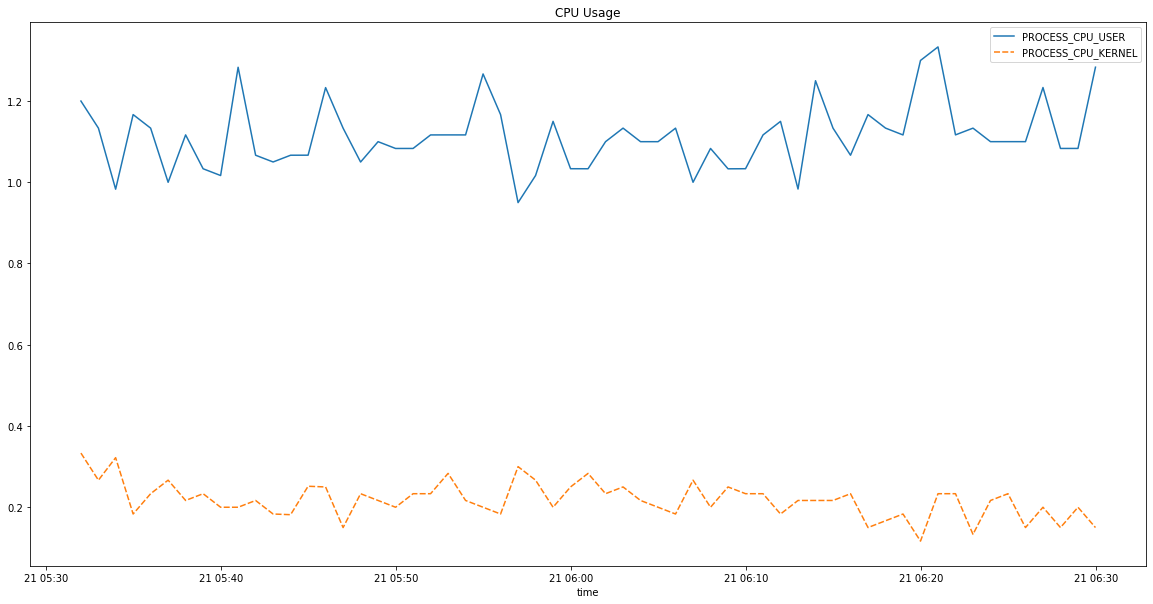

In [20]:
#metric_df.plot()
plt.figure(figsize=(20,10))
plt.title('CPU Usage')
sns.lineplot(data=metric_df)

In [21]:
metric_df['dummy'] = 1

print_df=metric_df.groupby(lambda x: True).agg(['min','mean','max'])
print_df.drop('dummy', inplace=True, axis=1)
print_df=print_df.transpose()
print_df

time                         True
PROCESS_CPU_USER   min   0.949842
                   mean  1.112840
                   max   1.333133
PROCESS_CPU_KERNEL min   0.116651
                   mean  0.217576
                   max   0.333294